# Analyzing and Visualizing WeRateDogs project

* This report describe three insights regarding analyzing WeRateDogs project and each insights have its own visualizations
* Especially, it is focus on retweet_count column to understand its correlation with other columns

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

df = pd.read_csv('twitter_archive_master.csv', encoding='utf-8')

df.in_reply_to_status_id = df.in_reply_to_status_id.fillna(0).astype('int64')
df.in_reply_to_user_id = df.in_reply_to_user_id.fillna(0).astype('int64')
df.timestamp = df.timestamp.astype('str')
df.name = df.name.astype('str')
df.jpg_url = df.jpg_url.astype('str')
df.p1 = df.p1.astype('str')
df.p2 = df.p2.astype('str')
df.p3 = df.p3.astype('str')

## 1 Understand distribution of tweets as per retweet_count

We need to understand distribution of number of tweets as per retweet_count. <br>
As we can see 'Whole tweets as per retweet_count', there is very small number of tweets are retweeted extremely high

* In the first histogram, we observe that very small number of tweet have big retweet_count.
* It seems that most of tweets's retweet_count is smaller than 10000

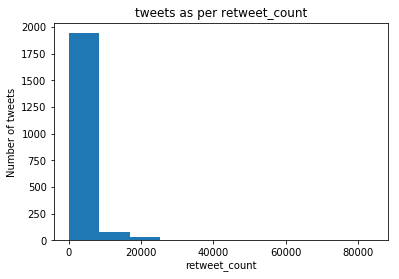

In [2]:
plt = df.retweet_count.plot(kind='hist', title='tweets as per retweet_count')
plt.set_xlabel("retweet_count")
plt.set_ylabel("Number of tweets")
plt

* To analyze more regarding between the number of tweets and retweet_count, all tweets they are divided into two groups, as most of tweets have (retweet_count < 10000
 * df.retweet_count<10000 , 1970 tweets are belong here
 * this group is gradually decreasing as per retweet_count then other group
 * df.retweet_count>=10000, only 98 tweets are belong here
 * this group is decreasing extremely as per retweet_count then other group

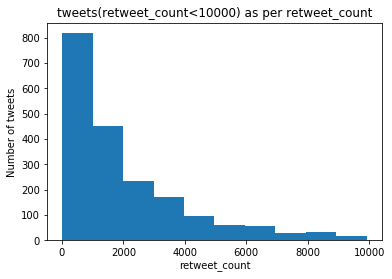

In [3]:
plt = df[df.retweet_count<10000].retweet_count.plot(kind='hist', title='tweets(retweet_count<10000) as per retweet_count')
plt.set_xlabel("retweet_count")
plt.set_ylabel("Number of tweets")
plt

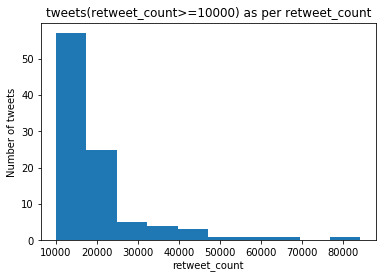

In [4]:
plt = df[df.retweet_count>=10000].retweet_count.plot(kind='hist', title='tweets(retweet_count>=10000) as per retweet_count')
plt.set_xlabel("retweet_count")
plt.set_ylabel("Number of tweets")
plt

In [5]:
df[df.retweet_count < 10000].retweet_count.describe()

count    1970.000000
mean     2013.915228
std      2016.279232
min        12.000000
25%       581.250000
50%      1245.500000
75%      2832.750000
max      9917.000000
Name: retweet_count, dtype: float64

In [6]:
df[df.retweet_count >= 10000].retweet_count.describe()

count       98.000000
mean     19117.785714
std      12165.174540
min      10047.000000
25%      11463.250000
50%      15841.000000
75%      18972.500000
max      84240.000000
Name: retweet_count, dtype: float64

## 2 Distribution of tweets as per retweet_count and favorite_count

To know tweet's distribution as per retweet_count and favorite_count, and also we hope to know regarding correlation coefficient between them
* According scatter plot of retweet_count/favorite_count, they have very positive relationship
* 0.85 is correlation coefficient value.

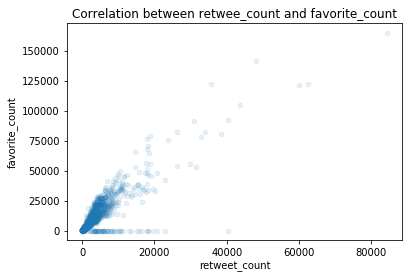

In [7]:
df.plot.scatter(x='retweet_count',
                y='favorite_count', alpha=0.1,
                title='Correlation between retwee_count and favorite_count')

* Actual correlation coefficient value

In [8]:
df.retweet_count.corr(df.favorite_count)

0.8560484868962263

## 3 If tweet is doggo, floofer, pupper or puppo, is it related retweet_count?
If tweet is recognized as doggo, floofer, pupper or puppo, theses tweet's retweet_count and favorite_count are higher than other?

* Correlation coefficient between retweet_count and favorite_count as per doggo, floofer, pupper or puppo
 * Two groups are defined like below, and they have similar correlation coefficient
 * One group have at least one doggo, floofer, pupper or puppo
 * 0.87
 * The group have none of doggo, floofer, pupper and puppo
 * 0.87
* Conclusion is that If tweet is recognized as doggo, floofer, pupper or puppo, retwee_count and favorite_count are not different with other tweets
 * Even correlation coefficient of two groups are same as 0.87, distribution/shape of scatter plot might be different.
 * However, distribution/shape of scatter plot from two groups are similar

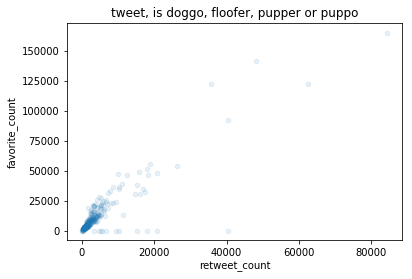

In [14]:
df_not_none = df[(df.doggo == 'doggo') | (df.floofer == 'floofer') | (df.pupper == 'pupper') | (df.puppo == 'puppo')]
df_not_none.plot.scatter(x='retweet_count',
                y='favorite_count', alpha=0.1,
                title='tweet, is doggo, floofer, pupper or puppo')

* Actual correlation coefficient value of group have at least one doggo, floofer, pupper or puppo

In [15]:
df_not_none.retweet_count.corr(df_not_none.favorite_count)

0.8782001471840263

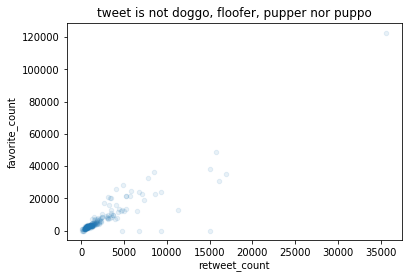

In [18]:
df_none = df[(df.doggo == 'None') & (df.floofer == 'None') & (df.pupper == 'pupper') & (df.puppo == 'None')]
df_none.plot.scatter(x='retweet_count', 
                     y='favorite_count',
                     alpha=0.1,
                     title='tweet is not doggo, floofer, pupper nor puppo')

* Actual correlation coefficient value of group have none of doggo, floofer, pupper and puppo

In [17]:
df_none.retweet_count.corr(df_none.favorite_count)

0.879759492217311